In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
d = {'Name': ['pratik','kartik','kishor','ishwar','rahul','pasha','aryan','sanket','srb',
              'prashant','yogesh','vicky','john','neha','komal','pooja','dock','bard','rambo','rocky','allu','salman'],
     'Age' : [27,29,29,28,42,39,41,38,36,35,37,26,27,28,29,32,40,41,43,39,41,39], 
    'Income' : [70000,90000,61000,60000,150000,155000,160000,162000,156000,130000,137000,45000,48000,
                51000,49500,53000,65000,63000,64000,80000,82000,58000]}
df = pd.DataFrame(data=d)
df

,Name,Age,Income
0,pratik,27,70000
1,kartik,29,90000
2,kishor,29,61000
3,ishwar,28,60000
4,rahul,42,150000
5,pasha,39,155000
6,aryan,41,160000
7,sanket,38,162000
8,srb,36,156000
9,prashant,35,130000


In [3]:
df.to_csv('Income.csv')

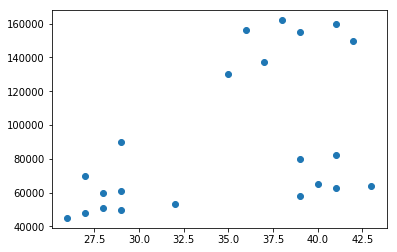

In [4]:
plt.scatter(df['Age'],df['Income'])
plt.show()

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
y_pred = km.fit_predict(df[['Age','Income']])
y_pred

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [9]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income,Cluster
0,pratik,27,70000,2
1,kartik,29,90000,2
2,kishor,29,61000,0
3,ishwar,28,60000,0
4,rahul,42,150000,1


In [21]:
km.cluster_centers_

array([[3.29090909e+01, 5.61363636e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.40000000e+01, 8.05000000e+04]])

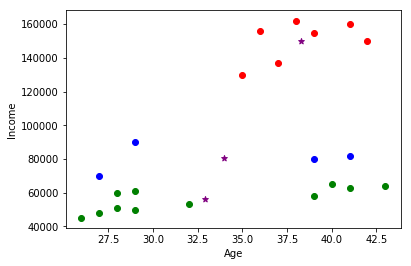

In [22]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income'],color='Green')
plt.scatter(df2.Age,df2['Income'],color='Red')
plt.scatter(df3.Age,df3['Income'],color='Blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
df.dtypes

Name        object
Age        float64
Income     float64
Cluster      int32
dtype: object

In [18]:
df['Income'] = df['Income'].astype('float64')
df['Age'] = df['Age'].astype('float64')

In [25]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [27]:
df.head()

,Name,Age,Income,Cluster
0,pratik,0.058824,0.213675,2
1,kartik,0.176471,0.384615,2
2,kishor,0.176471,0.136752,0
3,ishwar,0.117647,0.128205,0
4,rahul,0.941176,0.897436,1


In [28]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age','Income']])
y_pred

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [29]:
km.cluster_centers_

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

In [33]:
df.drop('Cluster',axis='columns',inplace=True)

In [35]:
df['Cluster'] = y_pred
df.head()

,Name,Age,Income,Cluster
0,pratik,0.058824,0.213675,1
1,kartik,0.176471,0.384615,1
2,kishor,0.176471,0.136752,1
3,ishwar,0.117647,0.128205,1
4,rahul,0.941176,0.897436,0


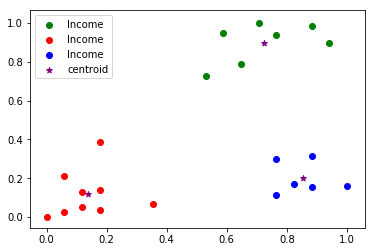

In [38]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income'],color='Green')
plt.scatter(df2.Age,df2['Income'],color='Red')
plt.scatter(df3.Age,df3['Income'],color='Blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.legend()